<a href="https://colab.research.google.com/github/Euan-J-Austin/Data_Analytics_and_Intelligence/blob/main/MULTILINEAR_REGRESSION_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MOUNT

%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/.shortcut-targets-by-id/19DFaxKzsTyJQzT1s4FwLYh5D9XB9MI1N/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
# LIBRARIES

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [3]:
# DATA

df = pd.read_csv('Clothing.csv')

# ANALYSE DATA

In [4]:
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [5]:
df.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


In [6]:
df.columns

Index(['tsales', 'sales', 'margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw',
       'hourspw', 'inv1', 'inv2', 'ssize', 'start'],
      dtype='object')

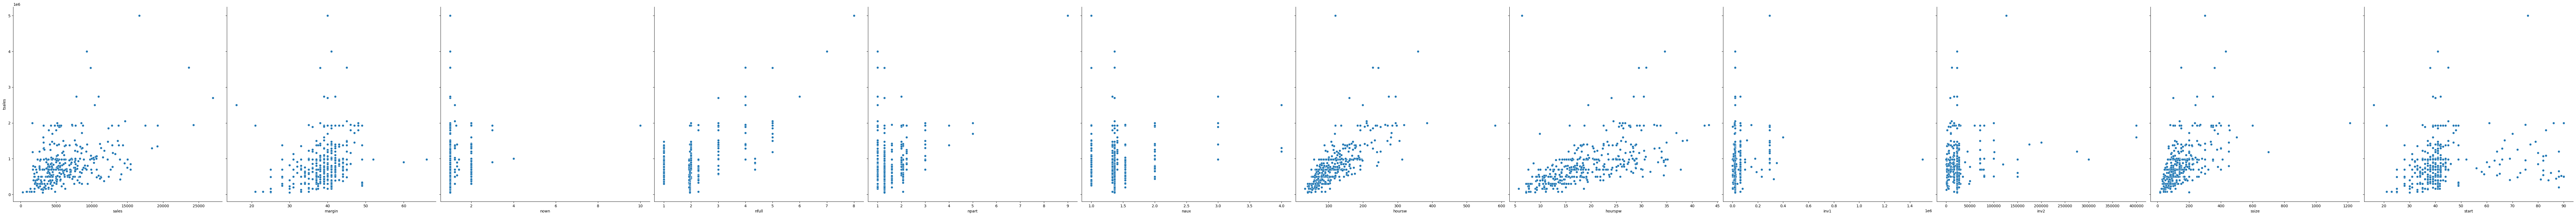

In [7]:
sns.pairplot(data = df,
             x_vars = ['sales', 'margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw', 'inv1', 'inv2', 'ssize', 'start'],
             y_vars = ['tsales'],
             height = 8)

<Axes: >

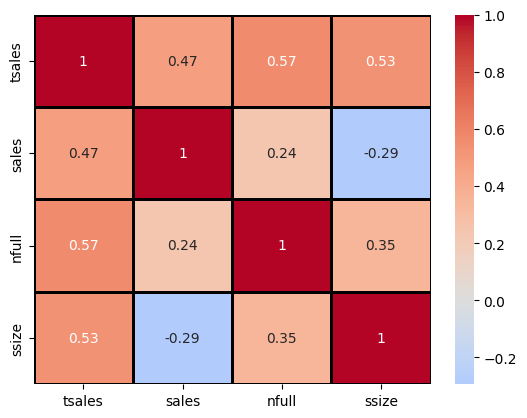

In [16]:
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')


In [9]:
df = df.drop(columns = [ 'margin', 'nown', 'npart', 'naux', 'hoursw', 'hourspw', 'inv1', 'inv2', 'start']) #dropped hourssw and hourspw after OLS Regression Results showed them to be statistically insigificant
df.head()

,tsales,sales,nfull,ssize
0,750000,4411.765,1.0000,170
1,1926395,4280.878,2.0000,450
2,1250000,4166.667,2.0000,300
3,694227,2670.104,1.0000,260
4,750000,15000.000,1.9556,50


# SELECT VARIABLES

In [10]:
y = df.tsales
x = df.drop(columns = ['tsales'])
X = sm.add_constant(x)

# TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split as tts

In [12]:
X_train, X_test, y_train, y_test = tts(X, y,
                                       test_size = 0.2,
                                       random_state=1502)

X_train.head()

,const,sales,nfull,ssize
201,1.0,4815.987,2.0000,400
25,1.0,3756.250,2.0000,160
94,1.0,4884.085,1.9556,200
346,1.0,3222.222,3.0000,450
121,1.0,2713.829,2.0000,350


# USE MULTILINEAR REGRESSION

In [13]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     381.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.01e-104
Time:                        23:06:21   Log-Likelihood:                -4449.7
No. Observations:                 320   AIC:                             8907.
Df Residuals:                     316   BIC:                             8923.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.034e+05   4.56e+04    -13.221      0.0

# ASSESS ACCURACY

In [14]:
predictions = model.predict(X_test)
predictions[:4]

270    2.723348e+06
380    4.312947e+05
326    1.015125e+06
60     7.317665e+05
dtype: float64

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {round(mean_absolute_error(y_test, predictions), 2)}')
print(f'RSME: {round(np.sqrt(mean_squared_error(y_test, predictions)), 2)}')

MAE: 195855.29
RSME: 420209.71
